In [2]:
import numpy as np
import pandas
import scipy.special
import matplotlib.pyplot

%matplotlib inline

from sklearn.metrics import confusion_matrix

In [3]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # link weight matrices, wih and who
        # wih : Weight Input Hidden
        # wih : Weight Output Hidden
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learning_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [4]:
# load the mnist training data CSV file into a list
train_data_file = open("G:/data/mnist_dataset/emnist-balanced-train.csv", 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

In [5]:
# load the mnist test data CSV file into a list
test_data_file = open("G:/data/mnist_dataset/emnist-balanced-test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

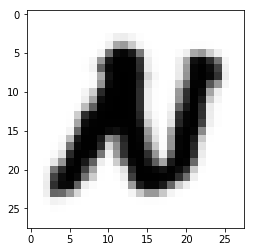

In [6]:
# Example
all_values = train_data_list[42].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))

matplotlib.pyplot.imshow(np.transpose(image_array), cmap='Greys', interpolation='None')

In [12]:
input_nodes = len(all_values)-1
hidden_nodes = 250
output_nodes = 47
print(input_nodes)
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

784


In [13]:
# Put train_data_list into numerical values
# and creating features/labels lists
features_train_list = []
labels_train_list = []
for record in train_data_list:
        # split the record by the ','
        all_values = record.split(',')
        
        feature = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # store it in a list
        features_train_list.append(feature) 

        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_record[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        
        labels_train_list.append(targets)
        pass

In [16]:
# Same with test dataset
features_test_list = []
labels_test_list = []
for record in test_data_list:  
        all_values = record.split(',')
        feature = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        features_test_list.append(feature) 
        
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99

        labels_test_list.append(targets)
        pass

In [17]:
# train the neuronal network
epochs = 3

for e in range(epochs):
    # go through all records in the training data set
    for i, elt in enumerate(features_test_list):
        n.train(features_test_list[i], labels_test_list[i])
        
        pass
    pass

In [18]:
# test the neural network
label_pred = []
label_true = []

# go through all the records in the test data set
for i, record in enumerate(features_test_list):
    # query the network
    outputs = n.query(features_test_list[i])

    # the index of the highest value corresponds to the label    
    label_pred.append(np.argmax(outputs))
    label_true.append(np.argmax(labels_test_list[i]))
    
    pass

In [19]:
#Calculate Confusion matrix
conf_matrix = confusion_matrix(label_true, label_pred)
print(conf_matrix)

[[326   0   0 ...   0   0   1]
 [  0 260   0 ...   0   1   6]
 [  1   0 307 ...   2   0   0]
 ...
 [  1   0   0 ... 123   1   2]
 [  1   0   0 ...   1 360   6]
 [  0   0   0 ...   0  11 327]]


In [28]:
# Calculate perfomance per label
perf_matrix = np.diag(conf_matrix)/conf_matrix.sum(axis=1)
print(perf_matrix)
print("Lowest classified group: ", np.argmin(perf_matrix))
print("Highest classified group: ", np.argmax(perf_matrix))

[0.815  0.65   0.7675 0.945  0.7875 0.9075 0.8475 0.895  0.86   0.885
 0.9025 0.9025 0.7825 0.855  0.8375 0.7425 0.8475 0.8475 0.5075 0.8475
 0.8425 0.4725 0.9525 0.8175 0.4425 0.8475 0.895  0.7925 0.565  0.89
 0.875  0.8975 0.98   0.905  0.825  0.84   0.5475 0.9325 0.925  0.885
 0.4775 0.5425 0.8575 0.835  0.3075 0.9    0.8175]
lowest classified group:  44
highest classified group:  32


In [29]:
# calculate the performance score
print("performance = ", sum(np.diag(conf_matrix))/ conf_matrix.sum() )

performance =  0.7936170212765957
